## Objetivos do projeto:

- Criar um modelo de Machine Learning capaz de prever se uma pessoa possui doença cardíaca a partir dos dados;
- Observar a diferença entre um modelo que é treinado a partir de um dataset onde as classes target do problema estão desbalanceadas (uma classe possui muito mais instâncias do que a outra) e um outro modelo onde a variável dependente é manipulada para obtermos a mesma quantidade de instâncias para ambas classes.


## Metodologia:

- Iremos realizar praticamente o mesmo passo a passo para os dois casos de forma a evidenciar as diferenças em resultados;
- O teste final será obrigatóriamente feito com o Dataset original (desbalanceado);


Column Discription

HeartDisease - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
BMI - Body Mass Index (BMI)

Smoking - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

AlcoholDrinking - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

Stroke - (Ever told) (you had) a stroke?

PhysicalHealth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)

MentalHealth - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)

DiffWalking - Do you have serious difficulty walking or climbing stairs?

Sex - Are you male or female?

AgeCategory - Fourteen-level age category

Race - Imputed race/ethnicity value

Diabetic - (Ever told) (you had) diabetes?

Physical Activity - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

GenHealth - Would you say that in general your health is...

SleepTime - On average, how many hours of sleep do you get in a 24-hour period?

Asthma - (Ever told) (you had) asthma?

KidneyDisease - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

SkinCancer - (Ever told) (you had) skin cancer?

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Pipeline Creation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Scoring

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier

pd.set_option("Max_columns", None)
import warnings


warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('heart_2020_cleaned.csv')

In [6]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Explorando a variável target do Dataset:

In [6]:
data['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [7]:
print('No Heart Disease', round(data['HeartDisease'].value_counts()[0]/len(data) *100,2), '% of the dataset')
print('Heart Disease', round(data['HeartDisease'].value_counts()[1]/len(data) *100,2), '% of the dataset')

No Heart Disease 91.44 % of the dataset
Heart Disease 8.56 % of the dataset


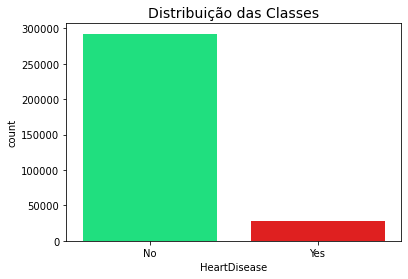

In [8]:
sns.countplot('HeartDisease', data=data, palette=['springgreen', 'red'])

plt.title('Distribuição das Classes', fontsize=14)
plt.show()

In [9]:
data.isnull().sum() # No null values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Podemos notar inicialmente que nosso dataset possui desbalanceamento de classes, nossa variável target possui 91.44% da classe 0 (sem doença cardíaca) enquanto apenas 8.56% corresponde a classe 1 (com doença cardíaca). Se treinarmos um modelo preditivo utilizando esta mesma distribuição, ele certamente irá sobreajustar aos dados, portanto teremos que fazer um balanceamento do nosso dataset.

In [10]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [11]:
cols = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']
cat_cols =  ['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']
num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

## Análise Exploratória dos Dados

Temos uma grande quantidade de variáveis categóricas. Embora nossos dados estejam desbalanceados, vamos observar a distribuição destas variáveis em comparação com a nossa variável target. Se conseguirmos observar uma tendência já nesses dados, existe uma grande chance da variável independente em questão ter uma alta correlação com a variável target.

In [12]:
def plot_cat(df, columns_to_plot, title):
    """
    Função para fazer um stacked plot de cada variável independente com a variável target.
    Parâmetros:
        DataFrame utilizado
        columns_to_plot (lista de strings): Nomes das colunas (categóricas) que serão plottadas
        title (string): Título geral do gráfico.
        
    """
    
    fig = plt.figure(figsize=(14, 25))
    fig.suptitle(title, fontsize=22, y=.95)
    
    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(7, 2, index)
        
        prop_by_independent = pd.crosstab(df[column], df['HeartDisease']).apply(lambda x: x/x.sum()*100, axis=1)
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                rot=0, color=['springgreen','red'])
        ax.legend(loc='upper right', bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Heart Disease', fancybox=True)
        
        ax.set_title(column + ' and Heart Disease',
                     fontsize=10, loc='left')
        ax.set_xlabel(None)
    
        ax.tick_params(rotation='auto')
        
        spine_names=('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

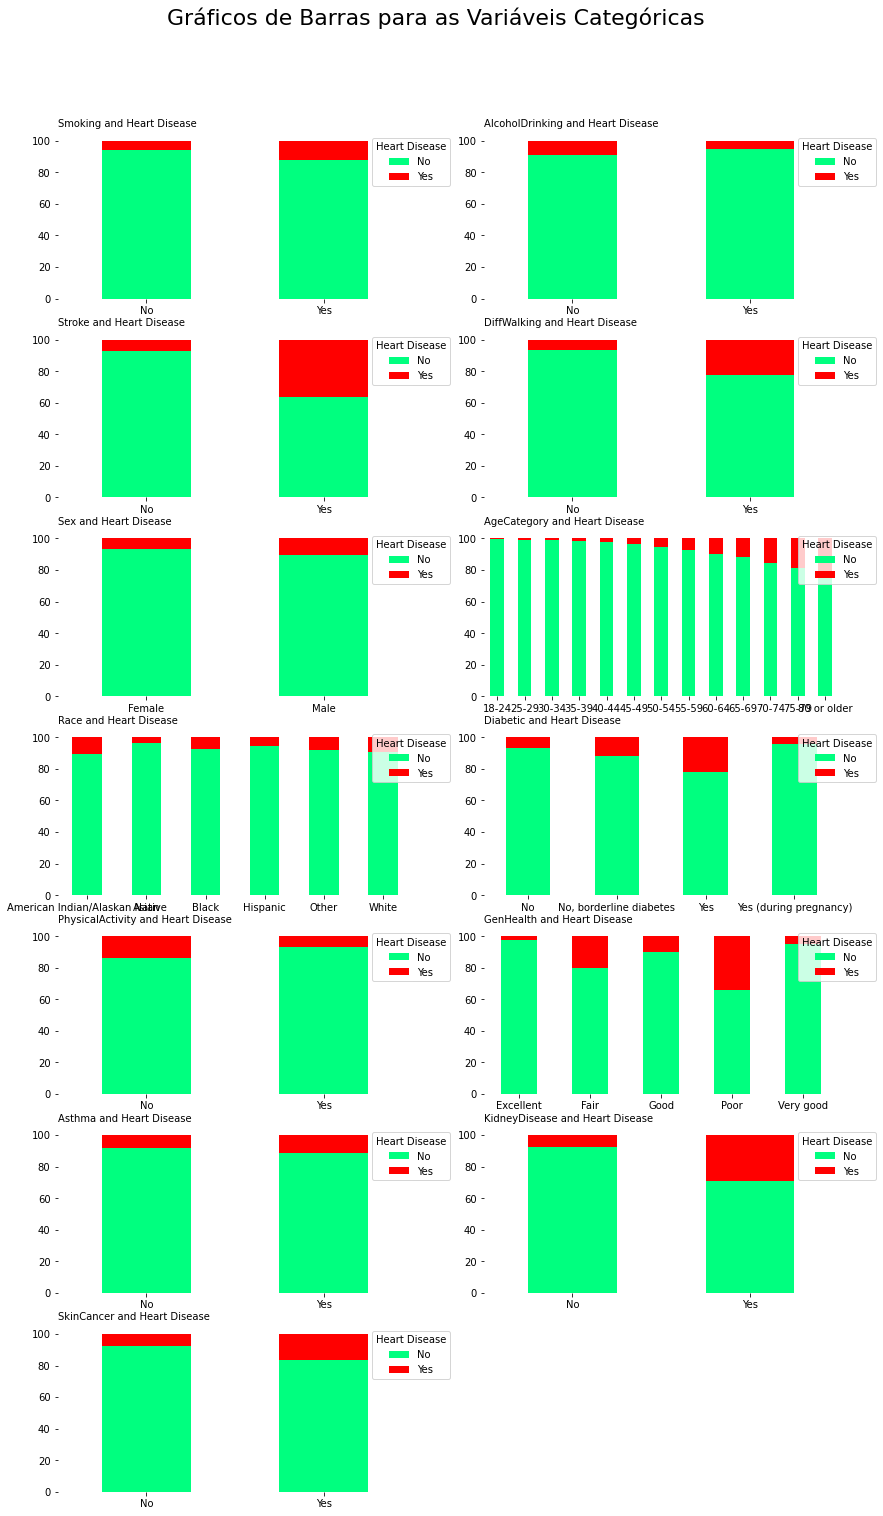

In [13]:
plot_cat(data, cat_cols, "Gráficos de Barras para as Variáveis Categóricas")

In [14]:
def histogram_plots(data, columns_to_plot, title):
    """
    data: Dataframe com os valores
    columns_to_plot: colunas numéricas do Dataframe para plotar
    title: Título do gráfico geral
    """
    
    fig = plt.figure(figsize=(12, 10))
    fig.suptitle(title, fontsize=22, y=.95)
    
    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(2, 2, index)
        
        data[data['HeartDisease']=='No'][column].plot(kind='hist', ax=ax, density=True,
                                                     alpha=0.5, color='springgreen', label='No')
        
        data[data['HeartDisease']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                      alpha=0.5, color='red', label='Yes')
                       
        ax.legend(loc='upper right', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Heart Disease', fancybox=True)
        
        ax.set_title('Distribuição de '+ column +' por Heart Disease',
                     fontsize=10, loc='left')
        ax.tick_params(rotation='auto')
        
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

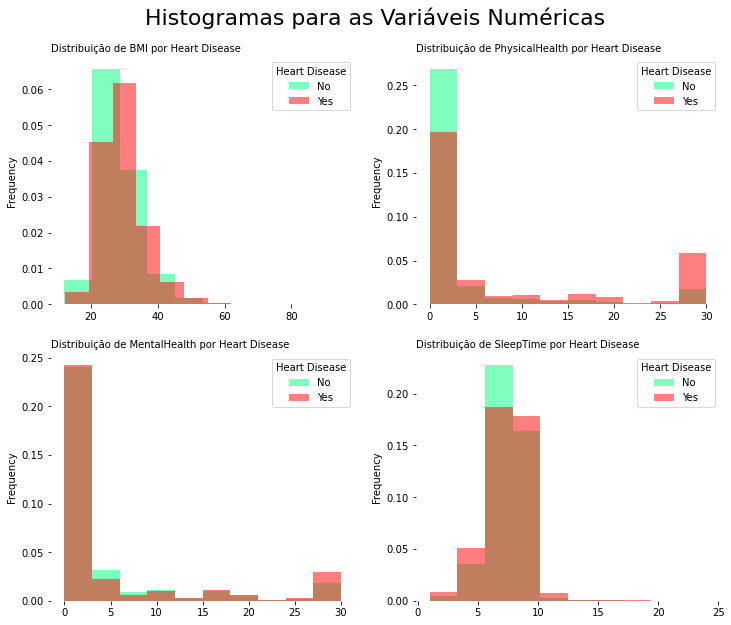

In [15]:
histogram_plots(data, num_cols, 'Histogramas para as Variáveis Numéricas')

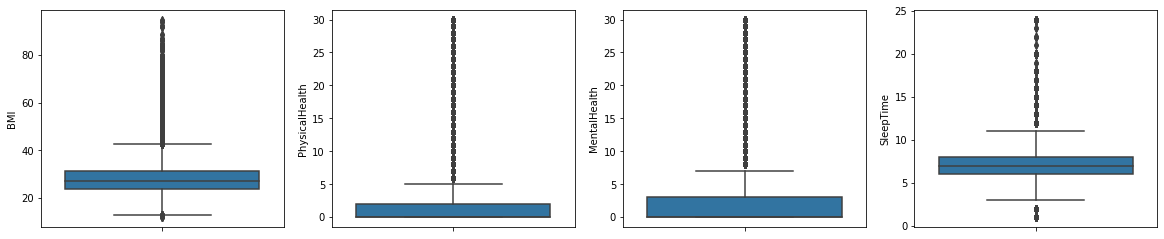

In [16]:
# Lidando com Outliers

f, axes = plt.subplots(ncols=4, figsize=(20,4))

for index, column in enumerate(num_cols, 0):
    sns.boxplot(y=column, data=data, ax=axes[index])

Iremos optar por não remover outliers da feature BMI pois embora alguns números se destaquem por serem altos demais, é possível que estejam corretos.


Alguns valores de SleepTime parecem altos demais, neste caso vamos remover valores acima de 14 horas por dia.

In [17]:
data = data.drop(data[data['SleepTime'] > 14].index)

Iremos calcular a importância que cada variável tem ao definir se o paciente possui doença cardíaca ou não utilizando a classe mutual_info_score da biblioteca do SKlearn.

In [18]:
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, data['HeartDisease'])

feature_importance = data[cat_cols].apply(compute_mutual_information).sort_values(ascending=False)

print(feature_importance)

AgeCategory         0.031893
GenHealth           0.028076
DiffWalking         0.015529
Diabetic            0.013303
Stroke              0.011838
KidneyDisease       0.006971
Smoking             0.005673
PhysicalActivity    0.004487
SkinCancer          0.003597
Sex                 0.002472
Race                0.001542
Asthma              0.000782
AlcoholDrinking     0.000592
dtype: float64


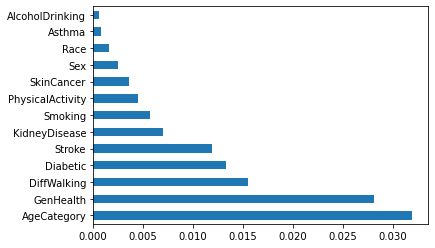

In [19]:
fi_series = pd.Series(feature_importance, index=cat_cols).sort_values(ascending=False)
fi_series.plot(kind='barh')

plt.show()

In [20]:
# Dividindo nossos dados em Treino e Teste

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

O cojunto de testes só será usado novamente quando nosso modelo já estiver pronto. Para analisar o desempenho de cada modelo daqui em frente será usada a validação cruzada no conjunto de treino.

# CRIAÇÃO DO PIPELINE

Optaremos por criar um Pipeline que realize todo o preprocessamento dos dados, visto que faremos este processo 3 vezes ao todo (para os conjuntos de treino balanceados e desbalanceados e posteriormente para o conjunto de teste durante a aferição do desempenho final do algorítmo).

In [21]:
one_hot_encoding_columns = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']
label_encoding_columns = ['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 
                          'PhysicalActivity','Asthma', 'KidneyDisease', 'SkinCancer']


num_pipeline = Pipeline([('std_scaler', StandardScaler())])
data_tr = num_pipeline.fit_transform(data[num_cols])

cat_pipeline = Pipeline([('one hot encoder', OneHotEncoder())])
cat_cols_tr = cat_pipeline.fit_transform(data[one_hot_encoding_columns])

binary_cat_pipeline = Pipeline([('ordinal encoder', OrdinalEncoder())])
binary_cat_tr = binary_cat_pipeline.fit_transform(data[label_encoding_columns])


pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, one_hot_encoding_columns),
    ("binary_cat", binary_cat_pipeline, label_encoding_columns)
])



In [22]:
X = pipeline.fit_transform(train_set)
y = train_set['HeartDisease'].map({'Yes': 1, 'No': 0})

## Treinamento dos Modelos de Classificação com o Dataset desbalanceado

In [23]:
classifier = {
    "DummyClassifier": DummyClassifier(strategy='most_frequent'), #baseline
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [24]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifier.items():
    classifier.fit(X,y)
    training_score = cross_val_score(classifier, X, y, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "possui um Training Score de",
          round(training_score.mean(), 2) * 100, "% accuracy")

Classifiers:  DummyClassifier possui um Training Score de 91.0 % accuracy
Classifiers:  LogisticRegression possui um Training Score de 92.0 % accuracy
Classifiers:  KNeighborsClassifier possui um Training Score de 91.0 % accuracy
Classifiers:  DecisionTreeClassifier possui um Training Score de 86.0 % accuracy
Classifiers:  RandomForestClassifier possui um Training Score de 91.0 % accuracy


In [25]:
imb_model = LogisticRegression().fit(X,y)

Deixaremos este modelo salvo para observar o seu desempenho futuramente. Antes disso criaremos um outro modelo, agora usando o dataset resultante do undersampling.

## Undersampling

In [26]:
data.head() #dataset original

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [27]:
# Undersampling

data = data.sample(frac=1) # shuffling data

HeartDisease_yes = data.loc[data['HeartDisease'] == 'Yes']
HeartDisease_no = data.loc[data['HeartDisease'] =='No'][:(len(HeartDisease_yes))]

data_balanced = pd.concat([HeartDisease_yes, HeartDisease_no])

balanced_df = data_balanced.sample(frac=1, random_state=42) # shuffle again

balanced_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
308953,Yes,25.83,Yes,No,No,0.0,2.0,No,Male,60-64,White,Yes,Yes,Good,6.0,No,Yes,No
5852,No,32.08,Yes,No,No,1.0,0.0,No,Male,50-54,White,No,Yes,Very good,7.0,No,No,No
310764,No,28.25,Yes,No,No,0.0,0.0,Yes,Female,80 or older,White,No,No,Fair,8.0,No,No,No
202728,Yes,34.33,Yes,No,Yes,0.0,0.0,No,Female,60-64,White,"No, borderline diabetes",Yes,Excellent,6.0,No,No,No
37103,Yes,33.19,Yes,No,No,0.0,0.0,No,Male,55-59,White,"No, borderline diabetes",Yes,Very good,7.0,No,No,No
68707,Yes,31.62,Yes,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,Yes,Very good,7.0,No,No,Yes
62350,No,35.30,No,No,No,0.0,0.0,No,Male,55-59,Asian,No,Yes,Good,6.0,No,No,No
276037,No,27.12,Yes,No,No,0.0,2.0,No,Male,18-24,White,No,Yes,Excellent,8.0,No,No,No
251380,Yes,28.08,No,No,No,3.0,3.0,No,Female,65-69,White,Yes,Yes,Poor,8.0,No,Yes,No
87570,Yes,26.71,No,No,No,5.0,0.0,No,Male,65-69,White,No,Yes,Very good,7.0,No,No,Yes


In [28]:
balanced_df.shape # 

(54532, 18)

## Análise dos dados Balanceados

A análise exploratória usando apenas uma parte do dataset total com certeza não será tão fiel quanto a original, porém o que estamos buscando aqui são padrões que fiquem evidenciados quando as classes da variável dependente tem as mesmas quantidades. Tendo em mente que estas relações mudariam caso usássemos instâncias diferentes do dataset original durante o Undersampling.

ex: A correlação entre a variável Stroke (derrame) com a variável target Heart Disease.

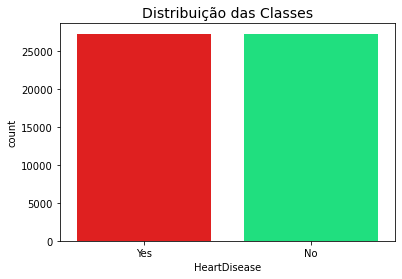

In [29]:
sns.countplot('HeartDisease', data=balanced_df, palette=['red','springgreen']) # conferindo a nova distribuição de classes

plt.title('Distribuição das Classes', fontsize=14)
plt.show()

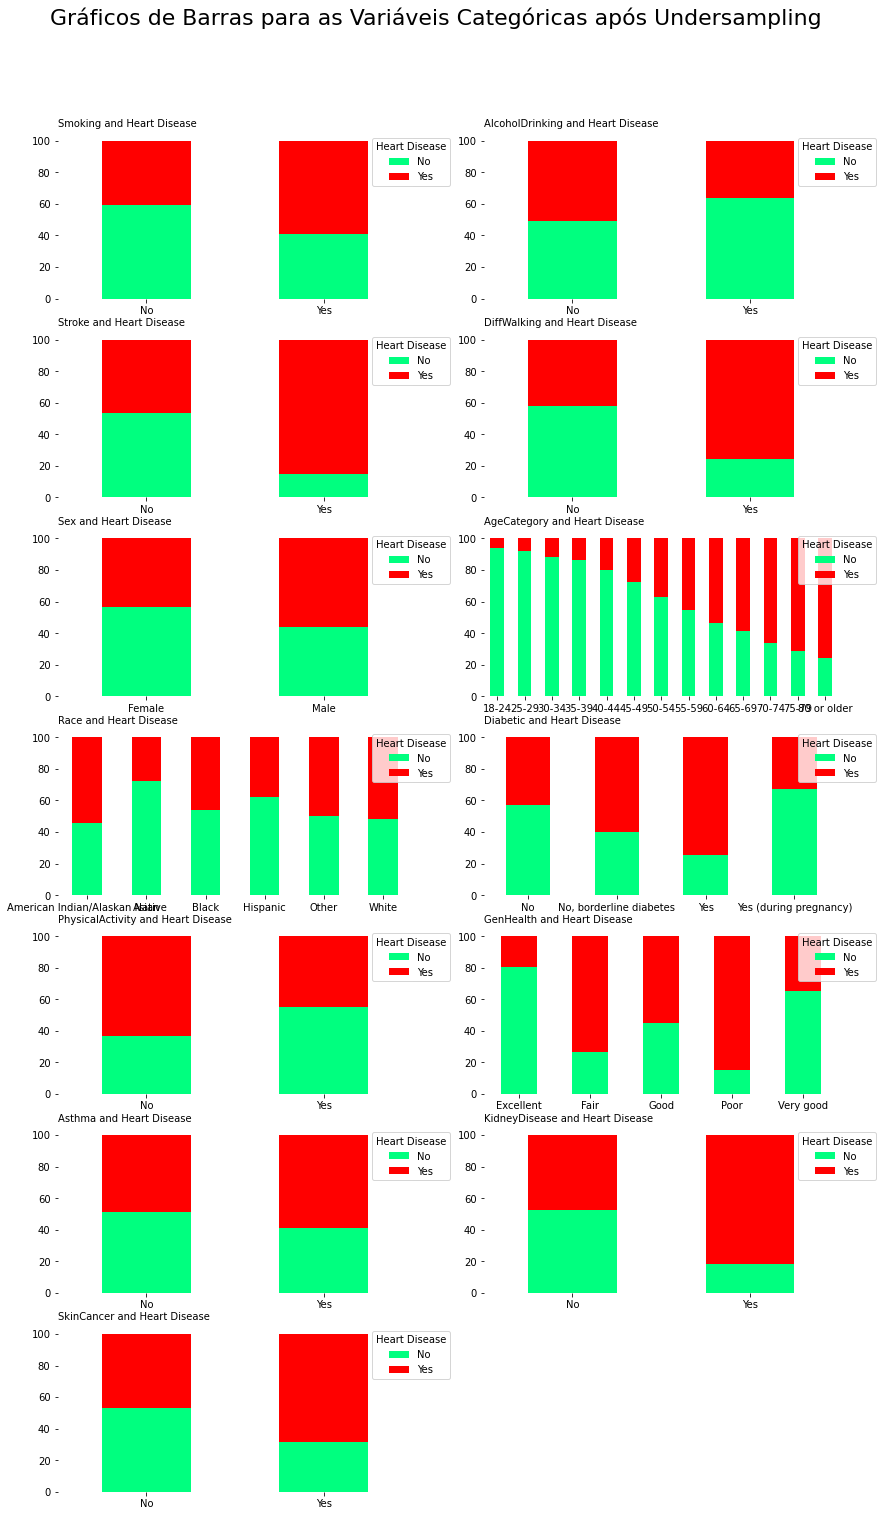

In [30]:
plot_cat(balanced_df, cat_cols, "Gráficos de Barras para as Variáveis Categóricas após Undersampling")

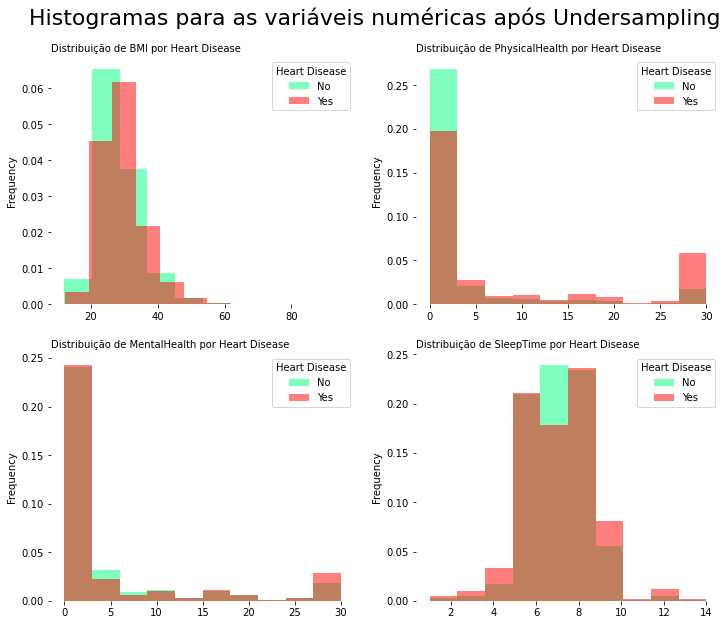

In [31]:
histogram_plots(balanced_df, num_cols, 'Histogramas para as variáveis numéricas após Undersampling')

In [32]:
from sklearn.metrics import mutual_info_score

def compute_mutual_information_balanced(categorical_serie):
    return mutual_info_score(categorical_serie, balanced_df['HeartDisease'])

feat_import_balanced = balanced_df[cat_cols].apply(compute_mutual_information_balanced).sort_values(ascending=False)

print(feat_import_balanced)

AgeCategory         0.106820
GenHealth           0.084396
DiffWalking         0.043408
Diabetic            0.036603
Stroke              0.028438
KidneyDisease       0.017905
Smoking             0.017365
PhysicalActivity    0.013588
SkinCancer          0.010736
Sex                 0.008455
Race                0.004732
Asthma              0.002754
AlcoholDrinking     0.002236
dtype: float64


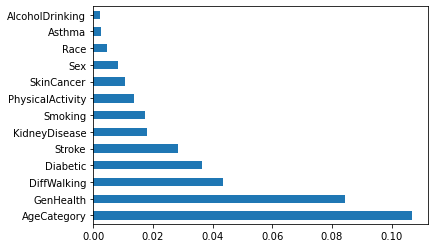

In [33]:
fib_series = pd.Series(feat_import_balanced, index=cat_cols).sort_values(ascending=False)
fib_series.plot(kind='barh')

plt.show()

In [34]:
# undersampling antes de fazer cross validation (propenso a overfitting)
X_undersampled = pipeline.fit_transform(balanced_df)
y_undersampled = balanced_df['HeartDisease'].map({'Yes': 1, 'No': 0})

## Treinamento dos Modelos de Classificação após Undersampling

In [35]:
classifier = {
    "DummyClassifier": DummyClassifier(strategy='most_frequent'), #baseline
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [36]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifier.items():
    classifier.fit(X_undersampled, y_undersampled)
    training_score = cross_val_score(classifier, X_undersampled, y_undersampled, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "possui um Training Score de",  round(training_score.mean(), 2) * 100, "% accuracy")

Classifiers:  DummyClassifier possui um Training Score de 50.0 % accuracy
Classifiers:  LogisticRegression possui um Training Score de 76.0 % accuracy
Classifiers:  KNeighborsClassifier possui um Training Score de 72.0 % accuracy
Classifiers:  DecisionTreeClassifier possui um Training Score de 67.0 % accuracy
Classifiers:  RandomForestClassifier possui um Training Score de 74.0 % accuracy


Podemos observar uma mudança considerável nos accuracy scores. Como esperado, o DummyClassifier obteve 50% de score e agora vemos uma diferença percentual grande no Accuracy Score dos demais modelos se comparado a nosso modelo Baseline.
Podemos inferir que embora o Score tenha diminuído, nosso modelo usando o dataset balaceado consegue detectar padrões nos dados muito melhor do que usando o dataset inteiro.

O modelo com melhor performance foi novamente o de Logistic Regression, porém iremos realizar o GridSearchCV para todos os modelos acima, ajustando nossos hiperparâmetros para tentar encontrar o modelo ideal para o nosso problema.

Vale lembrar também que Accuracy não é a nossa métrica mais importante, então ela por si só não significa que o modelo de Regressão Logística seja o superior.

## Ajuste dos Hiperparâmetros

In [37]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_undersampled, y_undersampled)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,8,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_undersampled, y_undersampled)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_undersampled, y_undersampled)

# tree best estimator
tree_clf = grid_tree.best_estimator_

# RandomForest Classifier

rf_params = {"n_estimators": [10, 100, 150, 300], "criterion": ['gini', 'entropy'],
             'max_depth': [2,3,5,8,10], "min_samples_split": [2, 3, 4, 5, 8, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_undersampled, y_undersampled)

rf_clf = grid_rf.best_estimator_

In [39]:
GridClassifier = {
    "LogisiticRegression": log_reg,
    "KNearest": knears_neighbors,
    "DecisionTreeClassifier": tree_clf,
    "RandomForestClassifier": rf_clf
}

In [40]:
for key, classifier in GridClassifier.items():
    training_score = cross_val_score(classifier, X_undersampled, y_undersampled, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "possui um Training Score de",  round(training_score.mean(), 2) * 100, "% accuracy")

Classifiers:  LogisticRegression possui um Training Score de 76.0 % accuracy
Classifiers:  KNeighborsClassifier possui um Training Score de 73.0 % accuracy
Classifiers:  DecisionTreeClassifier possui um Training Score de 69.0 % accuracy
Classifiers:  RandomForestClassifier possui um Training Score de 75.0 % accuracy


Notamos uma pequena melhora dos classificadores após o ajuste de hiperparâmetros. Entretanto, ainda estamos mais interessados em saber o Recall de cada um destes classificadores.

## Confusion Matrix e Classification Report

In [42]:
# Transformando o conjunto de teste com o Pipeline
y_test = test_set['HeartDisease'].map({'Yes':1, 'No': 0})
X_test = pipeline.fit_transform(test_set)

Vamos observar o Recall com os dados ainda desbalanceados para usar como base.

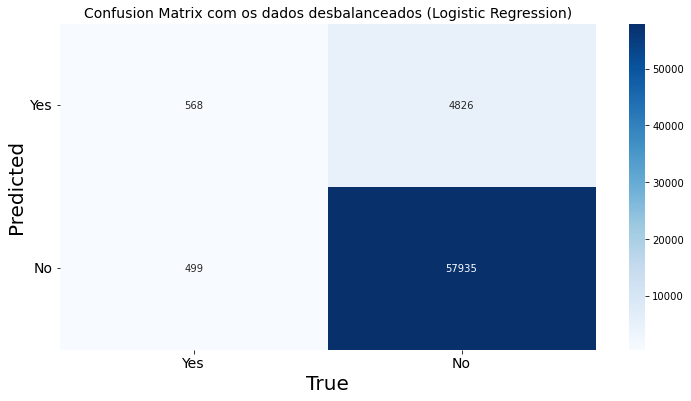

In [59]:
imb_model = LogisticRegression().fit(X, y)
imb_preds = imb_model.predict(X_test)
imb_confusion_matrix = confusion_matrix(y_test, imb_preds, labels=[1,0])

fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.heatmap(imb_confusion_matrix, ax=ax, annot=True, fmt='g', cmap="Blues")
ax.set_title("Confusion Matrix com os dados desbalanceados (Logistic Regression)", fontsize=14)
ax.set_xticklabels(['Yes', 'No'], fontsize=14, rotation=0)
ax.set_yticklabels(['Yes', 'No'], fontsize=14, rotation=360)
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('True', fontsize=20)

plt.show()

In [44]:
print(classification_report(y_test, imb_preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58434
           1       0.53      0.11      0.18      5394

    accuracy                           0.92     63828
   macro avg       0.73      0.55      0.57     63828
weighted avg       0.89      0.92      0.89     63828



Como podemos ver, o modelo de Regressão Logística usando o dataset original, embora apresente uma alta acurácia, possui apenas 11% de revogação para a classe 1. 

## Classification Reports

## Confusion Matrices

In [52]:
# Criando a Confusion Matrix para cada um dos modelos

log_reg_cf = confusion_matrix(y_test, lr_preds, labels=[1,0])
kneighbors_cf = confusion_matrix(y_test, knn_preds,labels=[1,0])
tree_cf = confusion_matrix(y_test, tree_preds, labels=[1,0])
rf_cf = confusion_matrix(y_test, rf_preds, labels=[1,0])




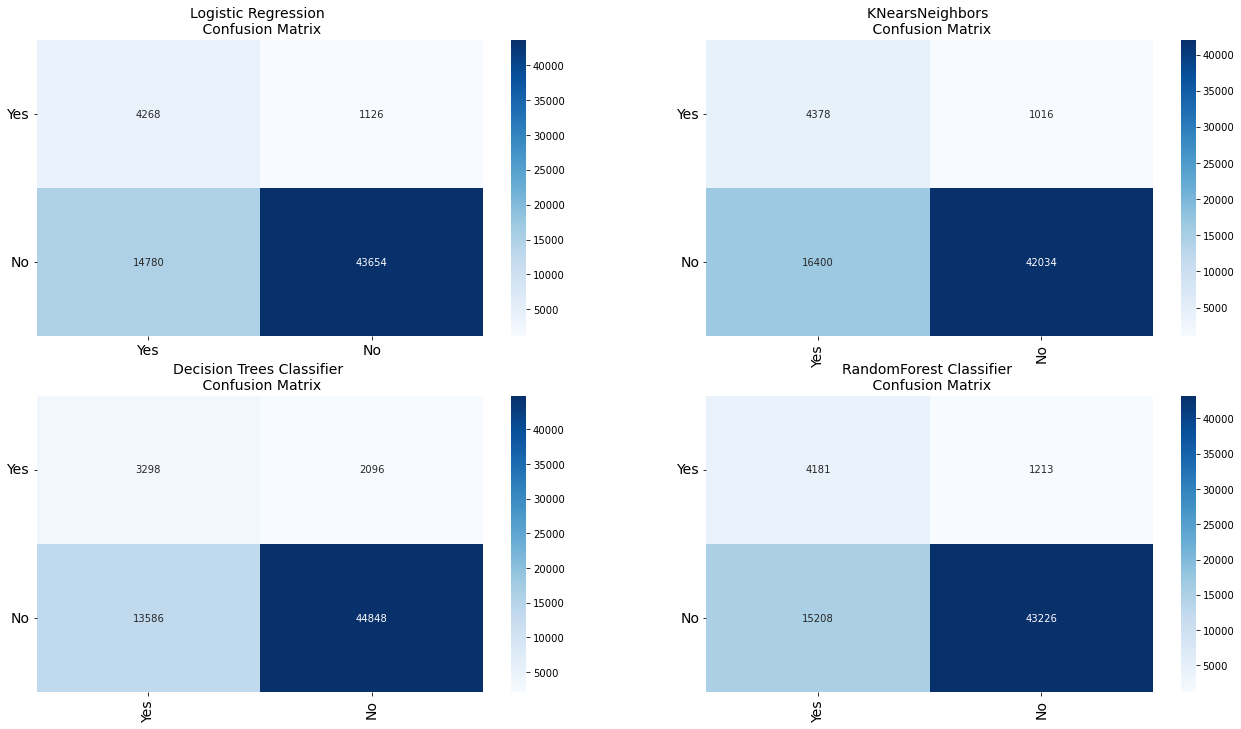

In [60]:
fig, ax = plt.subplots(2,2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, fmt='g', cmap="Blues")
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['Yes', 'No'], fontsize=14, rotation=0)
ax[0, 0].set_yticklabels(['Yes', 'No'], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, fmt='g', cmap="Blues")
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['Yes', 'No'], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['Yes', 'No'], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][0], annot=True, fmt='g', cmap="Blues")
ax[1][0].set_title("Decision Trees Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['Yes', 'No'], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['Yes', 'No'], fontsize=14, rotation=360)

sns.heatmap(rf_cf, ax=ax[1][1], annot=True, fmt='g', cmap="Blues")
ax[1][1].set_title("RandomForest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['Yes', 'No'], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['Yes', 'No'], fontsize=14, rotation=360)

plt.show()


In [54]:
lr_preds = log_reg.predict(X_test)
knn_preds = knears_neighbors.predict(X_test)
tree_preds = tree_clf.predict(X_test)
rf_preds = rf_clf.predict(X_test)

print('Logistic Regression:')
print(classification_report(y_test, lr_preds))
print('---' * 42)


print('KNears Neighbors:')
print(classification_report(y_test, knn_preds))
print('---' * 42)


print('Decision Tree:')
print(classification_report(y_test, tree_preds))
print('---' * 42)


print('Random Forest:')
print(classification_report(y_test, rf_preds))
print('---' * 42)


Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58434
           1       0.22      0.79      0.35      5394

    accuracy                           0.75     63828
   macro avg       0.60      0.77      0.60     63828
weighted avg       0.91      0.75      0.80     63828

------------------------------------------------------------------------------------------------------------------------------
KNears Neighbors:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     58434
           1       0.21      0.81      0.33      5394

    accuracy                           0.73     63828
   macro avg       0.59      0.77      0.58     63828
weighted avg       0.91      0.73      0.79     63828

------------------------------------------------------------------------------------------------------------------------------
Decision Tree:
              precision    recall  f1-

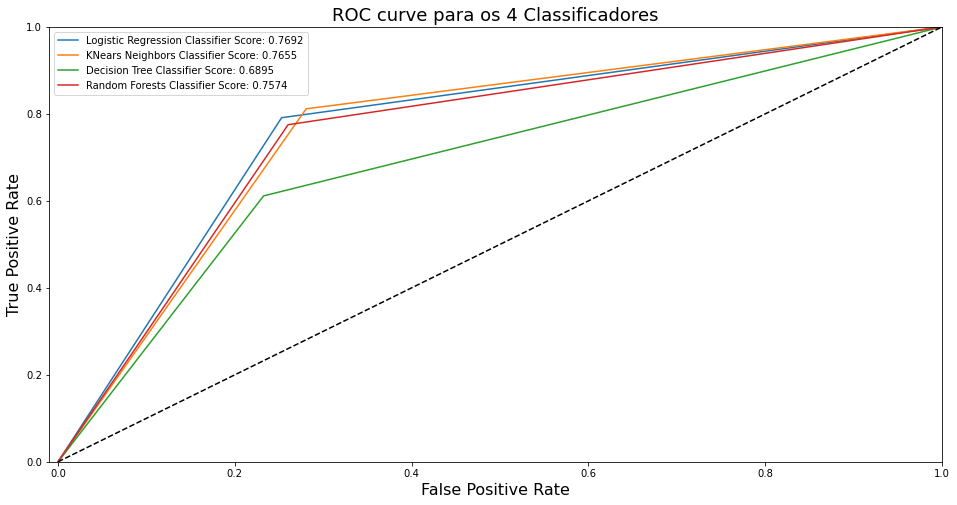

In [55]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, lr_preds)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_preds)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_preds)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_preds)

def roc_curve(log_fpr, log_tpr, knn_fpr, knn_tpr, tree_fpr, tree_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC curve para os 4 Classificadores', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, lr_preds)))
    plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, knn_preds)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, tree_preds)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forests Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, rf_preds)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    

    
roc_curve(log_fpr, log_tpr, knn_fpr, knn_tpr, tree_fpr, tree_tpr, rf_fpr, rf_tpr)
plt.show()

## Interpretação e Conclusão:

Para o nosso conjunto de dados especificamente, queremos encontrar um modelo que nos entregue um valor de Recall (revogação ou sensibilidade) alto. Nosso problema consiste em prever se um paciente possui ou tem chances altas de ter alguma doença cardíaca, portanto estamos mais preocupados em prever corretamente instâncias da classe 1 (Sim).

Pelos nossos resultados, percebemos que com o dataset balanceado obtivemos um valor de recall de 0.79 para a classe 1, comparado com apenas 0.11 no dataset desbalanceado. Isso significa que o procedimento de undersampling melhorou consideravelmente o desempenho do nosso modelo para o problema proposto.